In [20]:
from IPython.display import display, HTML
display(HTML("""
<style>
div.container{width:90% !important;}
div.cell.code_cell.rendered{width:100%;}
div.input_prompt{padding:0px;}
div.CodeMirror {font-family:Consolas; font-size:12pt;}
div.text_cell_render.rendered_html{font-size:12pt;}
div.output {font-size:12pt; font-weight:bold;}
div.input {font-family:Consolas; font-size:12pt;}
div.prompt {min-width:70px;}
div#toc-wrapper{padding-top:120px;}
div.text_cell_render ul li{font-size:12pt;padding:5px;}
table.dataframe{font-size:12px;}
</style>
"""))

<b><font size="6" color="red">ch10. N차원 배열(Numpy 배열) 다루기(4절~6절)</font></b>

# 4. copy 및 view
## 4.1.할당(assignment)

In [2]:
import numpy as np

In [3]:
a = np.arange(12)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

In [4]:
b = a

In [5]:
a.shape, a.ndim, id(a), type(a)

((12,), 1, 2414634710384, numpy.ndarray)

In [6]:
b.shape, b.ndim, id(b), type(b)

((12,), 1, 2414634710384, numpy.ndarray)

In [7]:
a is b # 동일 객체

True

In [8]:
a==b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True])

In [10]:
np.all(a==b)

True

In [11]:
b.shape = (3,4) # 할당받은 bdml shape를 수정

In [12]:
a.shape, a.ndim, id(a), type(a)

((3, 4), 2, 2414634710384, numpy.ndarray)

In [13]:
b.shape, b.ndim, id(b), type(b)

((3, 4), 2, 2414634710384, numpy.ndarray)

## 4.2.얕은 복사 : 뷰(view : 데이터의 틀) -> copy=False

In [17]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [18]:
a.reshape(2, 6)

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [19]:
c = a.view() # 얕은 복사(데이터의 틀만 복사하고 데이터 자체는 동일. 데이터를 바꾸면 a와 c 모두 바뀜)

In [20]:
print(id(a), id(c))

2414669352080 2414669365136


In [21]:
c==a

array([[ True,  True,  True,  True],
       [ True,  True,  True,  True],
       [ True,  True,  True,  True]])

In [23]:
c.shape = (2, 6)
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 6,  7,  8,  9, 10, 11]])

In [24]:
c[1, ::2] = [9,9,9] # 9 : 1행의 짝수번째 열 변경 
c

array([[ 0,  1,  2,  3,  4,  5],
       [ 9,  7,  9,  9,  9, 11]])

In [25]:
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  9,  7],
       [ 9,  9,  9, 11]])

## 4.3.깊은 복사

In [36]:
a = np.array([[5, 4, 13, 0],
            [99, 6, 16, 1],
            [20, 5, 14, 0]]) # 맨 오른쪽은 타겟변수(종속변수), 왼쪽 3개는 독립변수
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

In [37]:
# X = a[:, :-1] # 슬라이싱이 될 때 뷰가 반환됨(얕은 복사)
X # 독립변수가 복수면 대문자로 변수명 씀
X = a[:, :-1].copy() # 깊은 복사
X = np.array(a[:, :-1], copy=True)
X

array([[ 5,  4, 13],
       [99,  6, 16],
       [20,  5, 14]])

In [38]:
X[:, 0] = -9
X

array([[-9,  4, 13],
       [-9,  6, 16],
       [-9,  5, 14]])

In [39]:
a

array([[ 5,  4, 13,  0],
       [99,  6, 16,  1],
       [20,  5, 14,  0]])

# 5. 고급 인덱싱
## 5.1.인덱스 배열로 인덱싱

In [21]:
import numpy as np
a = np.arange(12)**2
a

array([  0,   1,   4,   9,  16,  25,  36,  49,  64,  81, 100, 121])

In [23]:
a[[0,5,9]] # 인덱스 자리에 리스트 삽입

array([ 0, 25, 81])

In [24]:
# 인덱싱하기 위한 값을 배열로 만들기
i = np.array([0,1,1,9])
a[i] # 결과는 i(인덱싱 배열)의 형태를 따라간다

array([ 0,  1,  1, 81])

In [25]:
i = np.array([[0,1],
              [1,9]])
a[i]

array([[ 0,  1],
       [ 1, 81]])

In [26]:
a[i] = 10
a

array([ 10,  10,   4,   9,  16,  25,  36,  49,  64,  10, 100, 121])

In [27]:
a[i] += 10 #1번 인덱스는 한 번만 10 증가

In [29]:
a

array([ 20,  20,   4,   9,  16,  25,  36,  49,  64,  20, 100, 121])

In [32]:
# 색상                R G B
palette = np.array([[0,0,0], # black
                    [255,0,0], # red
                    [0,255,0], # green
                    [0,0,225], # blue
                    [255,255,255]]) # white

In [34]:
image_index = np.array([[4,4,4,0,0,0,0,4,4,4],
                        [4,0,0,4,4,4,4,0,0,4],
                        [0,0,4,4,4,4,4,4,0,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,1,4,4,3,4,4,0],
                        [0,4,4,4,4,4,4,4,4,0],
                        [0,4,4,2,4,4,2,4,4,0],
                        [4,0,4,4,2,2,4,4,0,4],
                        [4,4,0,4,4,4,4,0,4,4],
                        [4,4,4,0,0,0,0,4,4,4]])
image_data = palette[image_index]
image_data

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255]],

       [[  0,   0,   0],
        [  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[  0,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [255,   0,   0],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 225],
        [255, 255, 255],
        [255, 255, 255],
        [  0,   0, 

In [35]:
image_data.shape

(10, 10, 3)

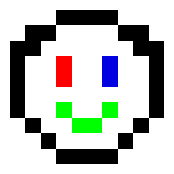

In [39]:
from matplotlib import pyplot as plt
# import matplotlib.pyplot as plt
plt.figure(figsize=(2,2))
plt.imshow(image_data)
plt.axis('off')
plt.show()

## 5.2.논리 배열을 이용한 인덱싱

In [48]:
a = np.arange(20)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19])

In [49]:
a%2==0 # 논리 배열

array([ True, False,  True, False,  True, False,  True, False,  True,
       False,  True, False,  True, False,  True, False,  True, False,
        True, False])

In [51]:
a[a%2==0] # boolean indexing : 논리 배열을 이용한 인덱싱 시 True인 요소만 추출

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

In [52]:
a[a>15]

array([16, 17, 18, 19])

# 6. 선형 대수
- 2차원 numpy 배열은 행렬
    * 행렬의 곱 : @
    * 단위행렬 : np.eye(n) : n행 n열의 단위행렬이 만들어짐
    * 전치행렬 : X.T, X.transpose() x행 y열 ->> y행 x열
    * 역행렬 : np.linalg.inv(X)

In [53]:
a = np.array([[1,2],
              [3,4]])
a

array([[1, 2],
       [3, 4]])

In [54]:
# a의 역행렬 : a의 역행렬 @ a = 단위행렬
np.linalg.inv(a)

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [55]:
np.linalg.inv(a) @ a

array([[ 1.00000000e+00,  4.44089210e-16],
       [-5.55111512e-17,  1.00000000e+00]])

In [56]:
# 정방행렬이 아니면 역행렬을 구할 수 없음
a = np.array([[1,2,1],
              [3,4,1]])
# np.linalg.inv(a) Error
a.T @ a 

array([[10, 14,  4],
       [14, 20,  6],
       [ 4,  6,  2]])

In [57]:
# 전치행렬을 곱하면 정방형렬이 아니었던 것이 정방행렬이 된다
a @ a.T

array([[ 6, 12],
       [12, 26]])

# 7. 연습문제 (실습형)

In [15]:
from sklearn import datasets
iris=datasets.load_iris()
iris_data=iris.data
iris_data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [18]:
# 1. 각 변수 별 평균을 출력하세요.
a = np.array([5.84333333, 3.05733333, 3.758, 1.19933333])
print(a)
print(a.mean())

[5.84333333 3.05733333 3.758      1.19933333]
3.4644999975000004


In [8]:
# 2. 처음 다섯 개 행을 출력하세요
b = np.array([[5.1, 3.5, 1.4, 0.2],
              [4.9, 3., 1.4, 0.2],
              [4.7, 3.2, 1.3, 0.2],
              [4.6, 3.2, 1.5, 0.2],
              [5., 3.6, 1.4, 0.2]])
print(b[0:,])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.2 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [9]:
# 3. 처음 다섯 개 행에서 마지막 열을 제외한 나머지 열을 출력하세요  
print(b[0:,0:-1])

[[5.1 3.5 1.4]
 [4.9 3.  1.4]
 [4.7 3.2 1.3]
 [4.6 3.2 1.5]
 [5.  3.6 1.4]]


In [10]:
# 4. 처음 다섯 개 행에서 마지막 열만 출력하세요
print(b[...,-1:])

[[0.2]
 [0.2]
 [0.2]
 [0.2]
 [0.2]]


In [ ]:
# 5. 3번 배열과 4번 배열을 원래 모양이 되도록 합치세요. 실행 결과는 2번의 결과와 같아야 합니다.

In [ ]:
# 6. 처음 다섯 개 행을 이용해서 각 열 별로 평균보다 큰 값들만 출력하세요

# 8. 연습문제 (문제풀이형)

In [11]:
# 1. 다음 보기의 데이터가 있을 경우 print(a.sum(0)) -> 3번

In [12]:
# 2. a 데이터가 다음과 같을 때 다음 중 차원을 바꿀 수 있는 방법을 모두 고르세요. -> 1~4번 모두

In [16]:
# 3. 다음 데이터에서 첫번째 행과 두번째 행만 뽑아내고 싶습니다. 빈칸에 들어갈 내용으로 옳은 것을 고르세요. -> 정답이 보기에 없음

In [17]:
# 4. 다음 코드의 실행 결과는? -> 4번

In [30]:
# 5. 다음 두 배열 a, b를 출력의 예시처럼 만들고 싶을 때 빈 칸에 입력해야 할 내용으로 바른 것은? -> 2번